In [10]:
import tensorflow as tf
print("Is GPU available: ", tf.test.is_gpu_available())

Is GPU available:  False


In [11]:
# !unzip -q /content/flowers.zip -d /content/dataset

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [13]:
import tensorflow as tf

class StopAtTargets(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        val_acc = logs.get('val_accuracy')
        val_loss = logs.get('val_loss')

        # Check if both conditions are met
        if val_acc is not None and val_loss is not None:
            if val_acc >= 0.82 and val_loss < 0.55:
                print(f"\nTarget reached at Epoch {epoch+1}!")
                print(f"Val Acc: {val_acc:.4f} >= 0.82")
                print(f"Val Loss: {val_loss:.4f} < 0.55")
                self.model.stop_training = True

# Create the instance
my_target_callback = StopAtTargets()

In [14]:
traindatagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,      # Rotate images
    width_shift_range=0.2,  # Move images left/right
    height_shift_range=0.2, # Move images up/down
    horizontal_flip=True,   # Flip images
    zoom_range=0.2,         # Zoom in/out
    fill_mode='nearest'
)
testdatagen = ImageDataGenerator(rescale=1./255)

model = keras.Sequential()



In [15]:
# #copying 30% images tro test folder for testing purposes



# import os
# import random
# import shutil

# # 1. Update these to your EXACT paths


# # DEBUG: Check if the train path even exists
# if not os.path.exists(train_root):
#     print(f"ERROR: The system cannot find the path: {train_root}")
# else:
#     classes = os.listdir(train_root)
#     print(f"Found {len(classes)} items in the train folder: {classes}")

#     for class_name in classes:
#         train_class_path = os.path.join(train_root, class_name)

#         # Check if it's a directory
#         if os.path.isdir(train_class_path):
#             test_class_path = os.path.join(test_root, class_name)
#             os.makedirs(test_class_path, exist_ok=True)

#             all_images = [img for img in os.listdir(train_class_path)
#                           if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

#             print(f"Processing class '{class_name}': Found {len(all_images)} images.")

#             if len(all_images) > 0:
#                 num_to_move = min(240, len(all_images))
#                 selected_images = random.sample(all_images, num_to_move)

#                 for img_name in selected_images:
#                     source = os.path.join(train_class_path, img_name)
#                     destination = os.path.join(test_class_path, img_name)
#                     shutil.move(source, destination)

#                 print(f"Successfully moved {num_to_move} images to {test_class_path}")
#             else:
#                 print(f"Skipping '{class_name}': No images found inside.")
#         else:
#             print(f"Skipping '{class_name}': It is a file, not a folder.")

# print("\n--- Process Finished ---")

In [16]:
# model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(300,300,3)))
# model.add(layers.MaxPooling2D((2,2)))


# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(256,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(512,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Flatten())

# model.add(layers.Dense(1024,activation='relu'))

# model.add(layers.Dropout(0.6))

# model.add(layers.Dense(5,activation='softmax'))
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(300,300,3), padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))


model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())


model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5)) # Strong dropout here to hit  82% goal

model.add(layers.Dense(5, activation='softmax'))


In [17]:
# !ls -R /content/dataset

In [18]:
train_root = r'D:\PYTHON\cnn\flowers\train'
test_root = r'D:\PYTHON\cnn\flowers\test'
training = traindatagen.flow_from_directory(train_root,batch_size=64,target_size=(300,300))


testing = testdatagen.flow_from_directory(test_root,batch_size=64,target_size=(300,300))

Found 3117 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


In [19]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history = model.fit(training,validation_data=testing,epochs=60,callbacks=[my_target_callback] )

# history = model.fit(
#     training,
#     validation_data=testing,
#     epochs=100, # Set a high number; it will stop early
#     callbacks=[my_target_callback]
# )

d:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
 1/49 ━━━━━━━━━━━━━━━━━━━━ 19:42 25s/step - accuracy: 0.2344 - loss: 1.5920

KeyboardInterrupt: 

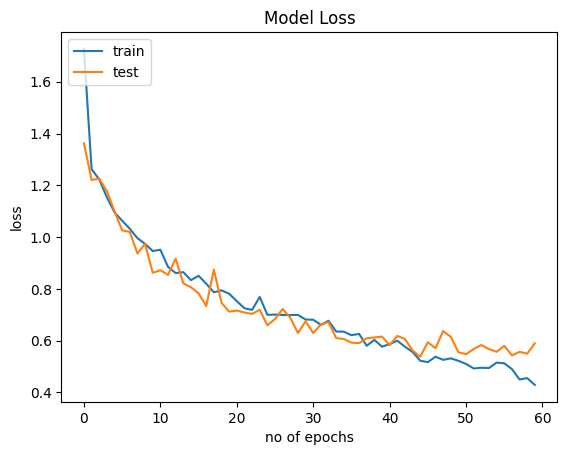

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()


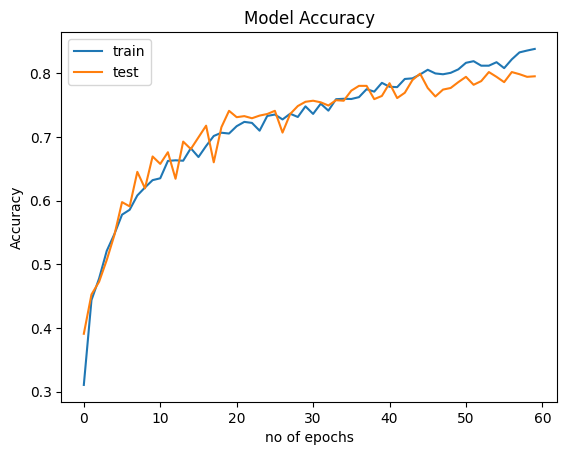

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('no of epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()


Found 1200 images belonging to 5 classes.
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step


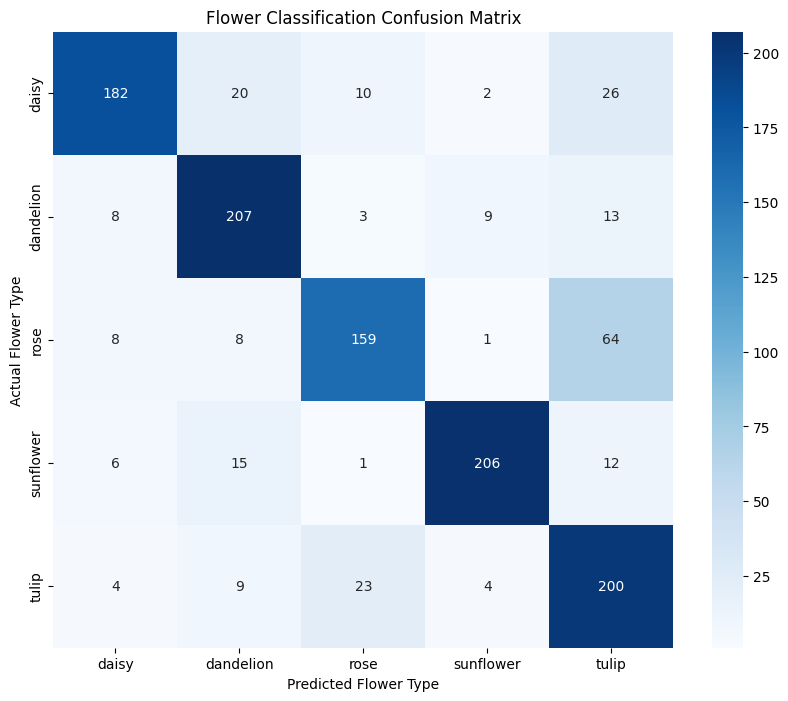

              precision    recall  f1-score   support

       daisy       0.88      0.76      0.81       240
   dandelion       0.80      0.86      0.83       240
        rose       0.81      0.66      0.73       240
   sunflower       0.93      0.86      0.89       240
       tulip       0.63      0.83      0.72       240

    accuracy                           0.80      1200
   macro avg       0.81      0.80      0.80      1200
weighted avg       0.81      0.80      0.80      1200



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Re-load the test data WITHOUT shuffling
# (This ensures the 'True Labels' match the 'Predictions')
test_root = '/content/dataset/test' # Adjust if your path is different
testing_for_matrix = testdatagen.flow_from_directory(
    test_root,
    target_size=(300, 300),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)

# 2. Get the model's predictions
Y_pred = model.predict(testing_for_matrix)
y_pred = np.argmax(Y_pred, axis=1) # Convert probabilities to class numbers

# 3. Create the Matrix
cm = confusion_matrix(testing_for_matrix.classes, y_pred)
class_names = list(testing_for_matrix.class_indices.keys())

# 4. Plot it beautifully
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Flower Classification Confusion Matrix')
plt.ylabel('Actual Flower Type')
plt.xlabel('Predicted Flower Type')
plt.show()

# 5. Print the text report (Precision, Recall, F1-Score)
print(classification_report(testing_for_matrix.classes, y_pred, target_names=class_names))

In [ ]:
model.save('flowerindentificationmodel80.keras')

NameError: name 'model' is not defined